## Лабораторна робота 6. **Unsupervised Learning**

Оцінювання даної роботи буде ураховувати якість Ваших висновків та візуалізацій. При наявності ЛИШЕ коду та візуалізацій без роз'яснень, робота оцінюватися НЕ БУДЕ.  

Більшість поставлених в цій лабораторній роботі задач в майбутньому буде ставитись Вами самойстійно!

Під час виконання Вам дозволено користуватися будь-якими зручними для вас бібліотеками для візуалізації. 

Оформлення коментарів повинно проводитися в текстових комірках ноутбука з використанням синтаксису [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Basics) для оформлення тексту та формул. 

Роботи ідентифіковані як ІДЕНТИЧНІ одразу отримують 0 балів.

## Кластерування  

В цій лабораторній роботі Ви будете вирішувати задачу класифікації БЕЗ вчителя. 

In [1]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering 
from scipy.cluster import hierarchy 
from scipy.spatial import distance_matrix 

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline 

import os
import warnings


warnings.filterwarnings('ignore')

**Завдання 0** 

Для початку необхідно завантажити вибірку `Mall_Customers` і перейменувати атрибути `Annual Income (k$)` в `Income`,`Spending Score (1-100)` в `SpendingScore`

In [2]:
customer_set = pd.read_csv("Mall_Customers.csv")

customer_set = customer_set.rename(columns={"Annual Income (k$)": "Income", "Spending Score (1-100)": "SpendingScore"})

**Завдання 1** 

Підготовка даних до опрацювання

* подивитись які атрибути містить вибірка; 
* вивести розмірність датасету;
* вивести основну статистичну інформацію по числовим змінним;  
* перевірити на наявність `NaN`.   

In [3]:
print("Атрибути вибірки:")
print(customer_set.columns)

print("\nРозмірність датасету:")
print(customer_set.shape)

print("\nОсновна статистична інформація:")
print(customer_set.describe())

print("\nПеревірка наявності NaN:")
print(customer_set.isnull().sum())


Атрибути вибірки:
Index(['CustomerID', 'Gender', 'Age', 'Income', 'SpendingScore'], dtype='object')

Розмірність датасету:
(200, 5)

Основна статистична інформація:
       CustomerID         Age      Income  SpendingScore
count  200.000000  200.000000  200.000000     200.000000
mean   100.500000   38.850000   60.560000      50.200000
std     57.879185   13.969007   26.264721      25.823522
min      1.000000   18.000000   15.000000       1.000000
25%     50.750000   28.750000   41.500000      34.750000
50%    100.500000   36.000000   61.500000      50.000000
75%    150.250000   49.000000   78.000000      73.000000
max    200.000000   70.000000  137.000000      99.000000

Перевірка наявності NaN:
CustomerID       0
Gender           0
Age              0
Income           0
SpendingScore    0
dtype: int64


## EDA Mall Customers

**Завдання 2** 

Як Ви могли помітити по статистичній аналітиці вибірки вона містить змінну `CustomerID`. Ця змінна не впливає на аналіз даних тому її можна видалити.

In [4]:
customer_set.drop('CustomerID', axis=1, inplace=True)

**Завдання 3** 

Побудувати діаграми розподілу по змінним `Age` , `Income` та `SpendingScore`

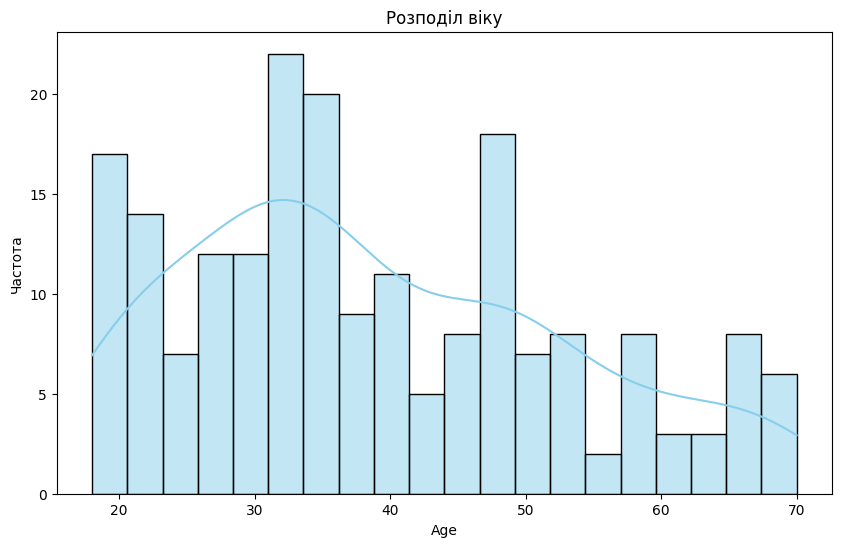

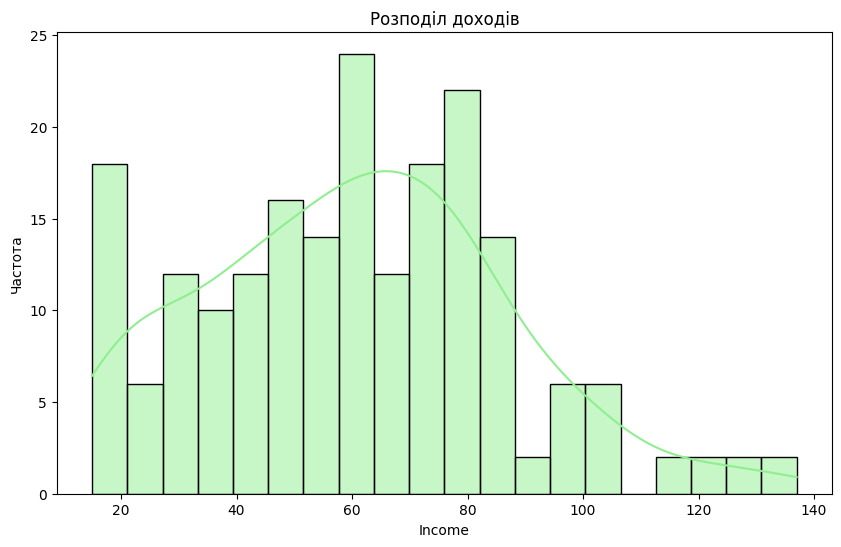

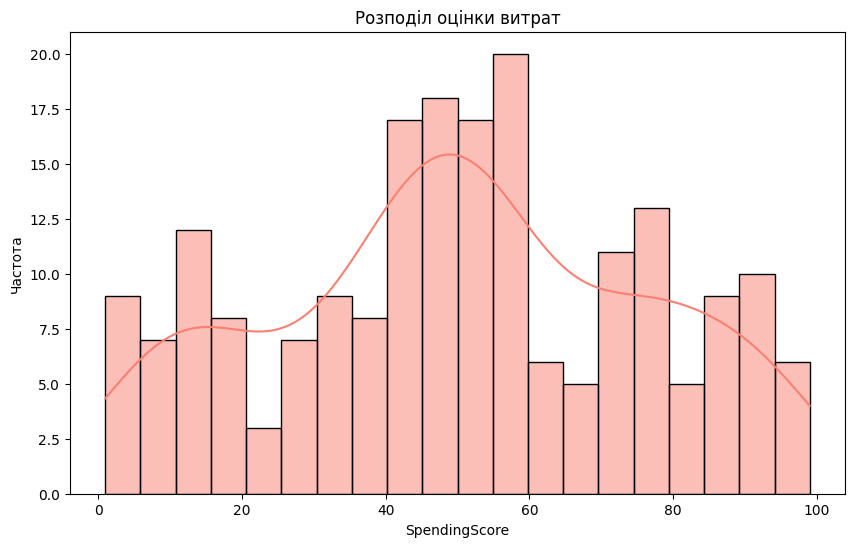

In [5]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_set['Age'], bins=20, kde=True, color='skyblue')
plt.title('Розподіл віку')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set['Income'], bins=20, kde=True, color='lightgreen')
plt.title('Розподіл доходів')
plt.xlabel('Income')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(customer_set['SpendingScore'], bins=20, kde=True, color='salmon')
plt.title('Розподіл оцінки витрат')
plt.xlabel('SpendingScore')
plt.ylabel('Частота')
plt.show()


**Завдання 4** 

Давайте подивимось на ці змінні `Age` , `Income` та `SpendingScore` відносно змінної `Gender`. 
* Побудуємо `pairplot` по всім змінним відностно змінної `Gender`:  
 
* Побудуємо `pairplot` використовуючи `sns.PairGrid` із заданими `(scatterplot)`, `(kdeplot)` та `(kdeplot, lw=1)` по відповідно правому верхньому куту, діагоналі і лівому нижньому кутут відносно змінної `Gender`:  
 

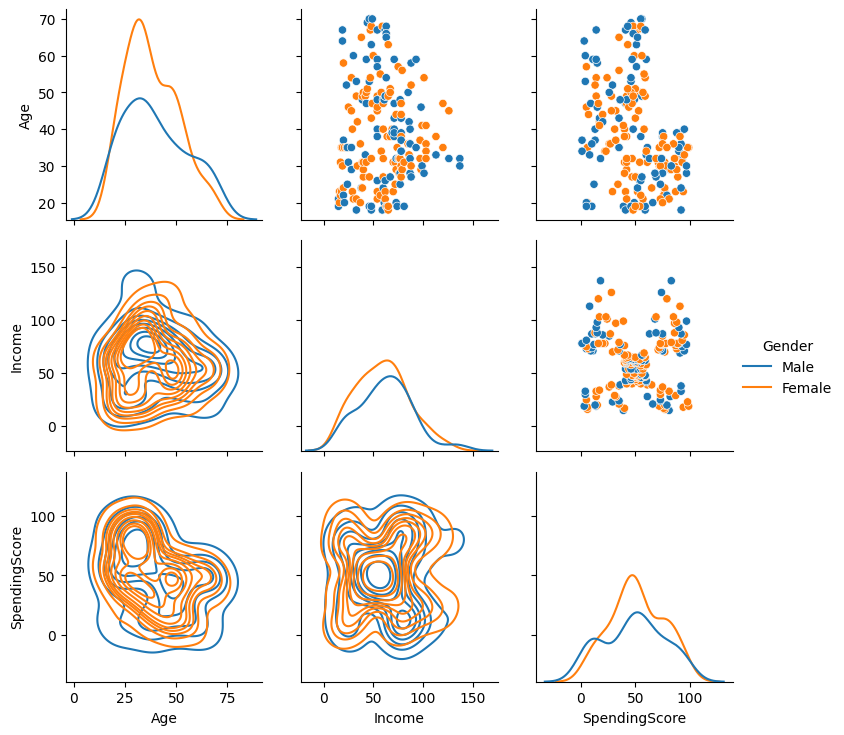

In [6]:
pair_grid = sns.PairGrid(customer_set, hue='Gender')
pair_grid.map_upper(sns.scatterplot)
pair_grid.map_diag(sns.kdeplot)
pair_grid.map_lower(sns.kdeplot, lw=1)
pair_grid.add_legend()
plt.show()

**Висновки з 1-4 завдання (детальні)**

Завдання 1:
Нам дано датасет із 200 спостережень та 5 змінними, включаючи CustomerID, Gender, Age, Income та SpendingScore.
    Розмірність датасету - (200, 5).
    Основна статистична інформація показує, що в середньому вік клієнтів складає 38.85 років, середній дохід - 60.56 тис. доларів і середній рівень витрат - 50.2.
    Немає відсутніх значень (NaN) в датасеті.

Завдання 2:
Стовпець CustomerID був успішно видалений з датасету, оскільки ця змінна не впливає на аналіз даних.

Завдання 3:
Розподіл віку показує, що найбільше клієнтів знаходиться у віковому діапазоні від 30 до 35 років, а найменше - у віковому діапазоні від 50 до 70 років.
За доходом більшість клієнтів мають дохід в діапазоні від 60 до 80 тис. доларів, але дуже мало клієнтів з доходом від 90 тис. доларів і більше.
Найбільша частота витрат припадає на діапазон від 40 до 60.

Завдання 4:
За графіками можна зробити висновок, що середній вік жінок у цьому наборі даних трохи вищий, ніж у чоловіків.
Жінки мають трохи вищий середній дохід порівняно з чоловіками.
Витрати жінок трохи вищі, ніж у чоловіків.

**Завдання 5** 

Проаналізувати змінну `Gender`:
* вивести співвідношення по статям;
* побудувати `countplot` по `Gender`;  
* побудувати `pie`по `Gender'.  

Співвідношення по статям:
Gender
Female    112
Male       88
Name: count, dtype: int64


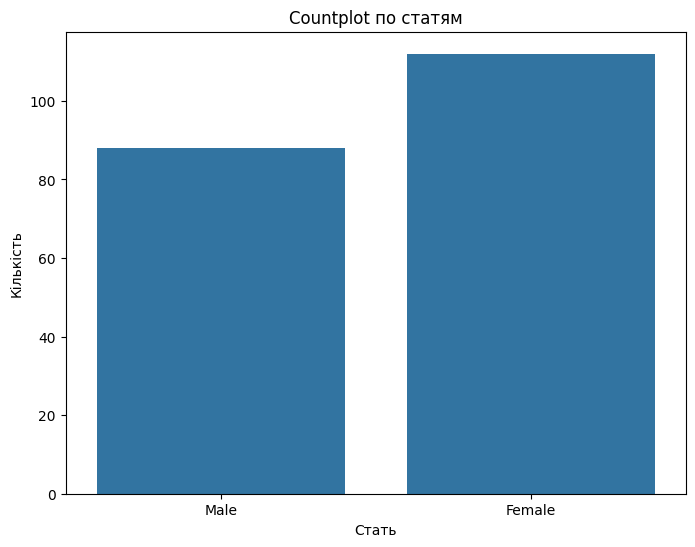

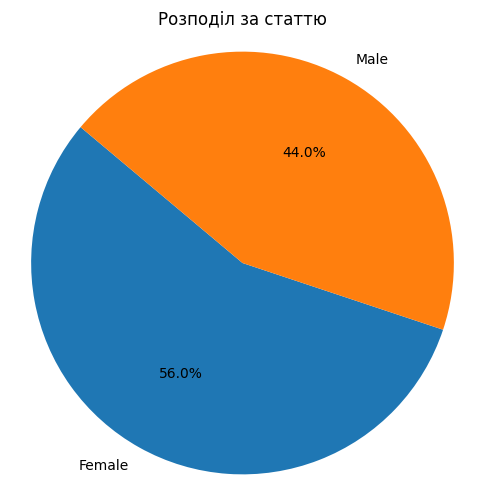

In [7]:
gender_count = customer_set['Gender'].value_counts()
print("Співвідношення по статям:")
print(gender_count)

plt.figure(figsize=(8, 6))
sns.countplot(x='Gender', data=customer_set)
plt.title('Countplot по статям')
plt.xlabel('Стать')
plt.ylabel('Кількість')
plt.show()

plt.figure(figsize=(6, 6))
plt.pie(gender_count, labels=gender_count.index, autopct='%1.1f%%', startangle=140)
plt.title('Розподіл за статтю')
plt.axis('equal')
plt.show()

**Завдання 6** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінних `Age` та `Income` відносно змінної `Gender` з різними параметрами:
*  подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`.

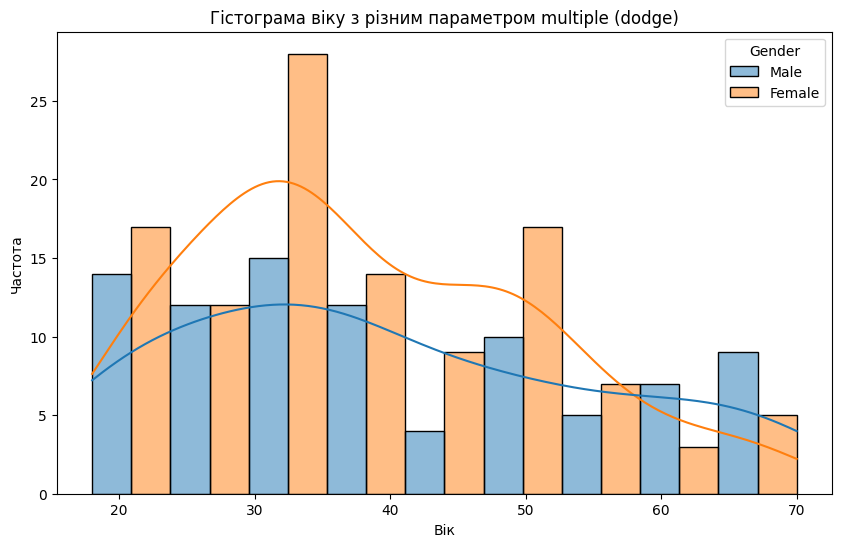

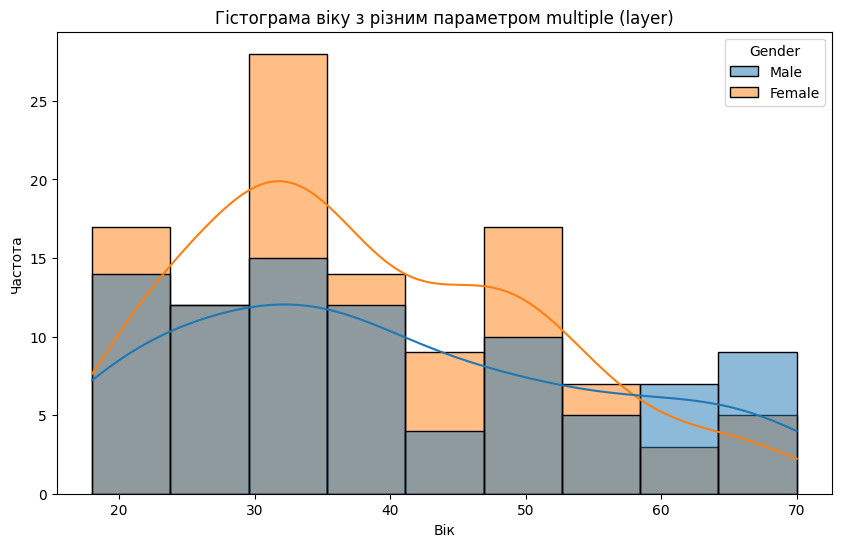

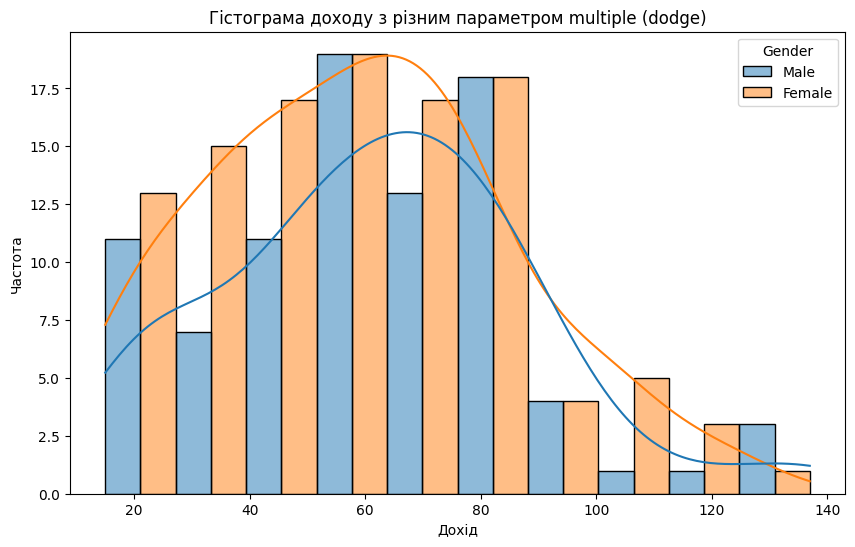

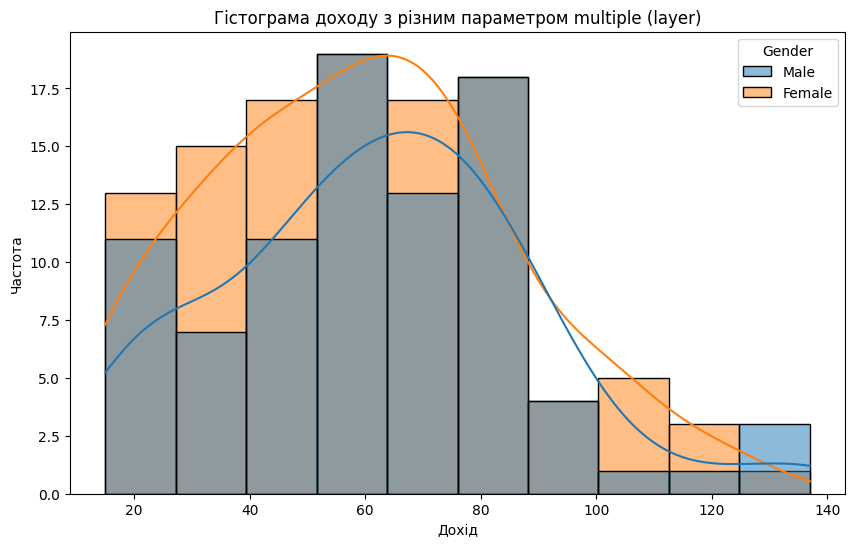

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='dodge', kde=True)
plt.title('Гістограма віку з різним параметром multiple (dodge)')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Age', hue='Gender', multiple='layer', kde=True)
plt.title('Гістограма віку з різним параметром multiple (layer)')
plt.xlabel('Вік')
plt.ylabel('Частота')
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='dodge', kde=True)
plt.title('Гістограма доходу з різним параметром multiple (dodge)')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='Income', hue='Gender', multiple='layer', kde=True)
plt.title('Гістограма доходу з різним параметром multiple (layer)')
plt.xlabel('Дохід')
plt.ylabel('Частота')
plt.show()

**Завдання 7** 

Побудувати гістограми [histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html) змінної `SpendingScore` відносно змінної `Gender` з різними параметрами:  
* подивитись на скільки змінюється візуалізація при різних значеннях параметра `multiple`, наприклад `dodge` та `layer`. 



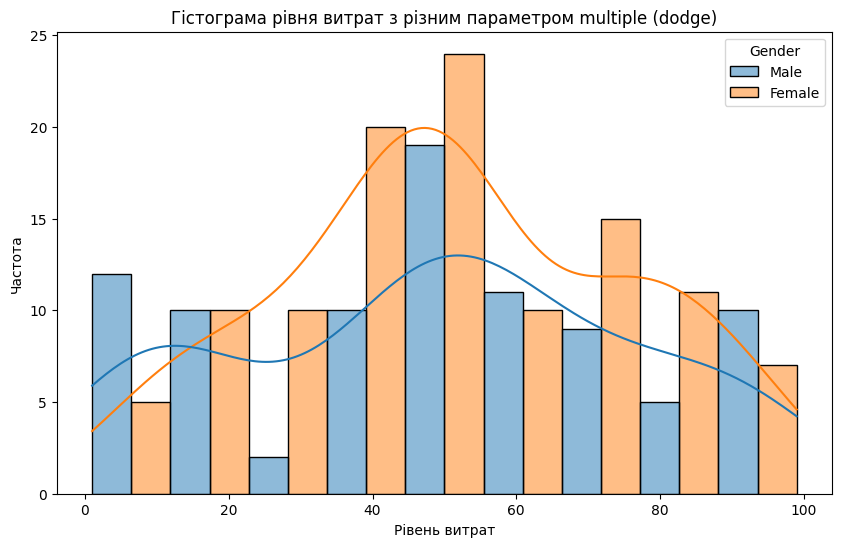

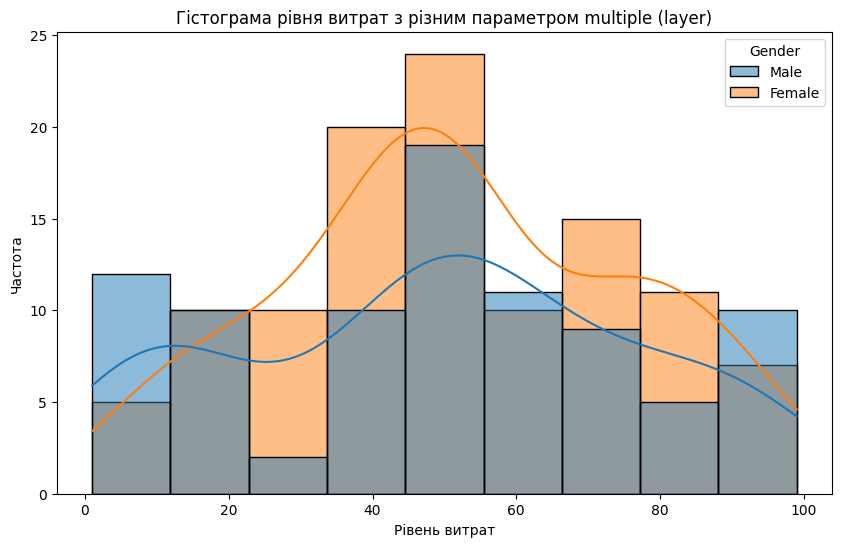

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='dodge', kde=True)
plt.title('Гістограма рівня витрат з різним параметром multiple (dodge)')
plt.xlabel('Рівень витрат')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=customer_set, x='SpendingScore', hue='Gender', multiple='layer', kde=True)
plt.title('Гістограма рівня витрат з різним параметром multiple (layer)')
plt.xlabel('Рівень витрат')
plt.ylabel('Частота')
plt.show()


**Завдання 8** 

Побудувати `boxplot` по змінній `SpendingScore` і подивитись як відрізняються витрати відностно змінної `Gender`. 

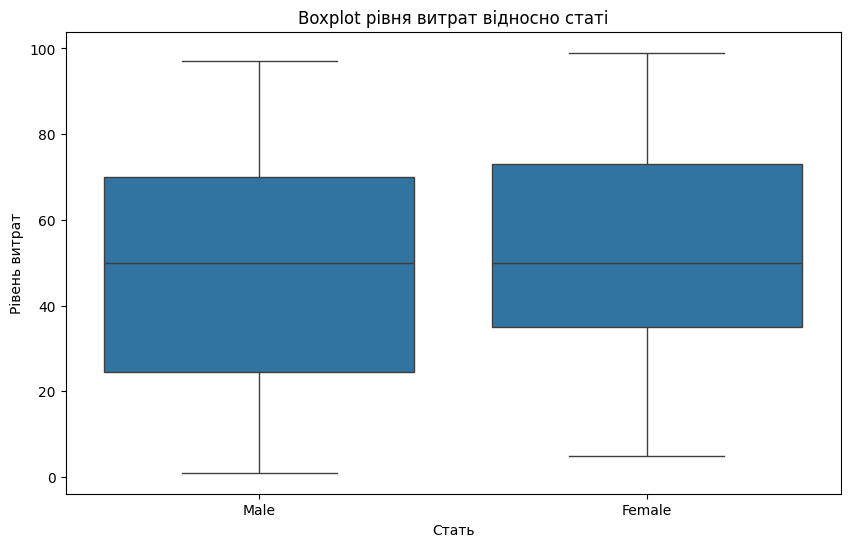

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='SpendingScore', data=customer_set)
plt.title('Boxplot рівня витрат відносно статі')
plt.xlabel('Стать')
plt.ylabel('Рівень витрат')
plt.show()

**Висновки з завдання 5 - 8(детальні)**

1. Співвідношення між групами чоловіків та жінок таке:
Чоловіки: 88 спостережень.
Жінки: 112 спостережень.
Це відображається як на countplot, де кількість жінок перевищує кількість чоловіків, так і на pie chart, де жінки складають 56% від загальної кількості, а чоловіки - 44%.
2. Групи розподілени по віці:
Найбільша частота віку спостерігається в діапазоні 30-35 років як у чоловіків, так і в жінок.
Зростання та зниження частоти спостерігається в одних і тих самих діапазонах віку як для чоловіків, так і для жінок.
3. Розподіл витрат:
Найбільша частота витрат спостерігається в діапазоні 60-80 для обох статей.
На boxplot видно, що витрати у жінок та чоловіків розподілені приблизно однаково, але середній рівень витрат для жінок трохи вищий.
4. Різниця в витратах між чоловіками та жінками:
Витрати у жінок розподілені в діапазоні від 35 до 75, тоді як витрати у чоловіків - від 25 до 70.
Середній рівень витрат у жінок трохи вищий, але в цілому розподіл витрат схожий між статями.

## K-means Method ##

**Завдання 9** 

Як Ви могли помітити, вибірка, з якою ми працюємо, не містить ключової зміної з вірними мітками. Тому перед початком кластерування необхідно визначити (підібрати) оптимальну кількість кластерів на яке буде проведено розбиття. Для цього необхідно:
1. видалити змінну `Gender`, тому що змінна Gender є категоріальною та не може бути використана безпосередньо для кластерування методом K-means, оскільки алгоритм потребує числові дані. Видалення цієї змінної перед кластеруванням дозволить уникнути помилок та неправильних результатів.;  
2. задати мінімальну та максимальну кількість кластерів самостійно;  
3. На прикладі алгоритму [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html), для ознайомлення з тим як працювати в умовах коли кількість кластерів невідома заздалегіть і немає вірних міток з позначками до якого кластеру відноситься спостереження пропонується використати метод [Elbow](https://coderoad.ru/19197715/Scikit-Learn-K-Means-Elbow-criterion) (додаткові джерела: [article_1](https://medium.com/analytics-vidhya/elbow-method-of-k-means-clustering-algorithm-a0c916adc540#:~:text=K%2Dmeans%20clustering%20is%20an,cluster%20with%20the%20nearest%20centroid.), [article_2](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/))

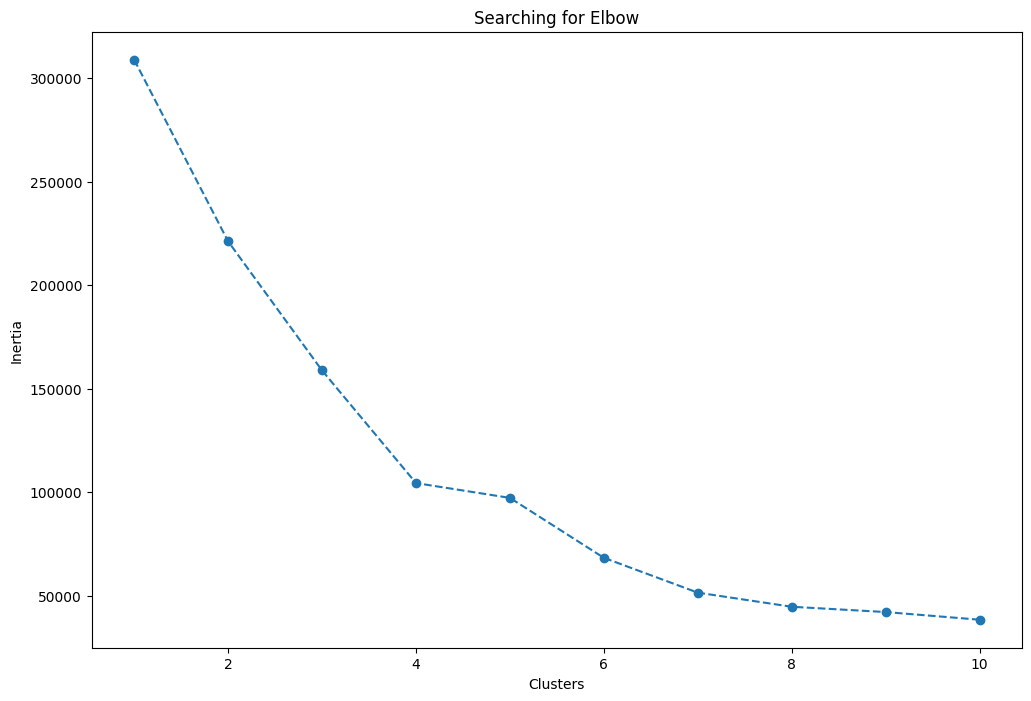

In [11]:



X = customer_set.drop(['Gender'], axis=1)
min_clusters = 1
max_clusters = 10
clusters = []
for i in range(min_clusters, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    clusters.append(kmeans.inertia_)
fig, ax = plt.subplots(figsize=(12, 8))
ax.plot(range(1, 11), clusters, marker='o', linestyle='--')
ax.set_title('Searching for Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')
plt.show()


**Висновки з завдання 9 (детальні)** 

1. У нашому випадку, можна припустити, що оптимальна кількість кластерів - 5 або 6. Це можна зробити з урахуванням зменшення нахилу графіка після цих значень.
2. Крім того, можна розглянути інші фактори при виборі кількості кластерів, такі як практична застосовність результатів кластерування, доменні знання та специфікації завдання.


**Завдання 10** 

Зробити двовимірну візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи змінні `Income` та `SpendingScore`. 

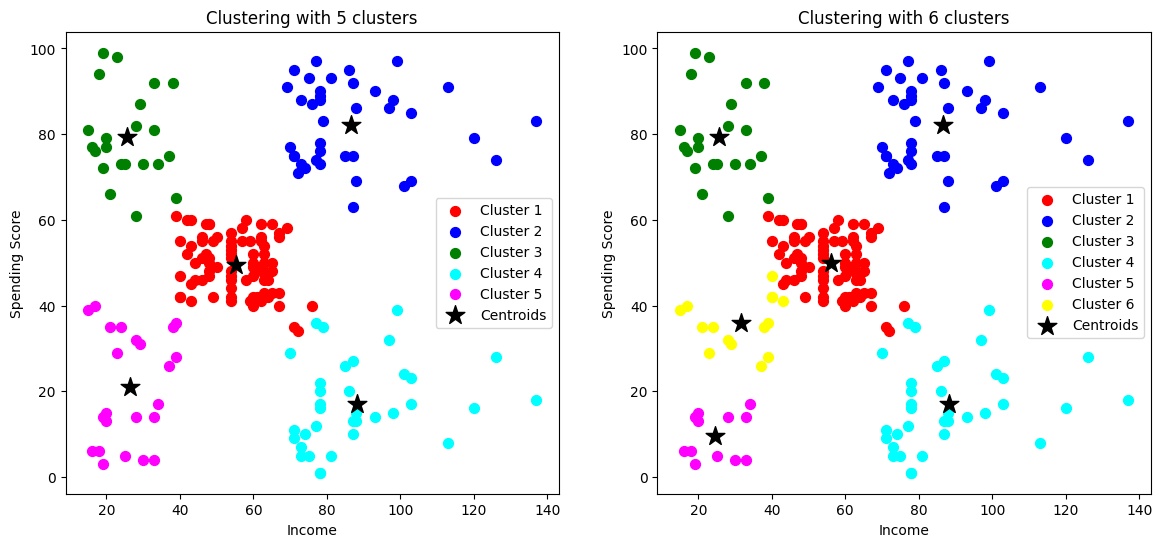

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

X = customer_set[['Income', 'SpendingScore']]

num_clusters_1 = 5
num_clusters_2 = 6

kmeans_1 = KMeans(n_clusters=num_clusters_1, init='k-means++', random_state=42)
kmeans_2 = KMeans(n_clusters=num_clusters_2, init='k-means++', random_state=42)
X['cluster_5'] = kmeans_1.fit_predict(X)
X['cluster_6'] = kmeans_2.fit_predict(X)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(X[X['cluster_5'] == 0]['Income'], X[X['cluster_5'] == 0]['SpendingScore'], s=50, c='red', label='Cluster 1')
plt.scatter(X[X['cluster_5'] == 1]['Income'], X[X['cluster_5'] == 1]['SpendingScore'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[X['cluster_5'] == 2]['Income'], X[X['cluster_5'] == 2]['SpendingScore'], s=50, c='green', label='Cluster 3')
plt.scatter(X[X['cluster_5'] == 3]['Income'], X[X['cluster_5'] == 3]['SpendingScore'], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[X['cluster_5'] == 4]['Income'], X[X['cluster_5'] == 4]['SpendingScore'], s=50, c='magenta', label='Cluster 5')
plt.scatter(kmeans_1.cluster_centers_[:, 0], kmeans_1.cluster_centers_[:, 1], s=200, c='black', marker='*', label='Centroids')
plt.title('Clustering with 5 clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(X[X['cluster_6'] == 0]['Income'], X[X['cluster_6'] == 0]['SpendingScore'], s=50, c='red', label='Cluster 1')
plt.scatter(X[X['cluster_6'] == 1]['Income'], X[X['cluster_6'] == 1]['SpendingScore'], s=50, c='blue', label='Cluster 2')
plt.scatter(X[X['cluster_6'] == 2]['Income'], X[X['cluster_6'] == 2]['SpendingScore'], s=50, c='green', label='Cluster 3')
plt.scatter(X[X['cluster_6'] == 3]['Income'], X[X['cluster_6'] == 3]['SpendingScore'], s=50, c='cyan', label='Cluster 4')
plt.scatter(X[X['cluster_6'] == 4]['Income'], X[X['cluster_6'] == 4]['SpendingScore'], s=50, c='magenta', label='Cluster 5')
plt.scatter(X[X['cluster_6'] == 5]['Income'], X[X['cluster_6'] == 5]['SpendingScore'], s=50, c='yellow', label='Cluster 6')
plt.scatter(kmeans_2.cluster_centers_[:, 0], kmeans_2.cluster_centers_[:, 1], s=200, c='black', marker='*', label='Centroids')
plt.title('Clustering with 6 clusters')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend()

plt.show()


**Завдання 11** 

Зробити візуалізацію кластеризації методу К-середніх на вибраних Вами двох різних кількостях кластерів використовуючи [scatter_3d](https://plotly.com/python/3d-scatter-plots/).

In [15]:
fig = px.scatter_3d(X, x='Income', y='SpendingScore', z=X['cluster_5'], color=X['cluster_5'], 
                    symbol=X['cluster_5'], opacity=0.7, 
                    title='Clustering with 5 clusters')
fig.update_traces(marker=dict(size=5))
fig.show()

fig = px.scatter_3d(X, x='Income', y='SpendingScore', z=X['cluster_6'], color=X['cluster_6'], 
                    symbol=X['cluster_6'], opacity=0.7, 
                    title='Clustering with 6 clusters')
fig.update_traces(marker=dict(size=5))
fig.show()


**Висновки з завдання 10 - 11 (детальні)** 

1. Оптимальна кількість кластерів: З огляду на описані характеристики кожного кластера та їхню розподілену споживчу поведінку, кількість кластерів дорівнює 6 здається оптимальною для цього датасету. Розділення на 6 кластерів дозволяє краще врахувати внутрішню структуру даних та виокремити різні групи клієнтів.

2.   Аналіз кластерів:

                Cluster 1 (40-60 Income, 40-60 Spending Score): Цей кластер має середній рівень доходу та середній рівень витрат. Ці клієнти можуть бути вважати типовими, що витрачають помірні суми грошей.

                Cluster 5 (0-15 Spending Score, 10-30 Income): Цей кластер має низький рівень доходу та низький рівень витрат. Ймовірно, це група економно орієнтованих клієнтів, які старанно керують своїми витратами.

                Cluster 6 (50-30 Spending Score, 20-40 Income): Цей кластер має високий рівень доходу, але низький рівень витрат. Можливо, це група клієнтів, які шукають високоякісні товари або послуги, але ретельно обмірковують свої витрати.

3. Різниця між кластерами 5 та 6: Розділення кластера 5 на кластери 5 і 6 дозволило краще уявити різницю у витратах клієнтів з низьким рівнем доходу. Кластер 6 виявився групою клієнтів з незначно вищим рівнем витрат, що може вказувати на певний рівень фінансової стабільності.

## Agglomerative clustering ##

Розглянемо ще один підхід до кластеризації - [агломеративну ієрархічну кластеризацію](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

**Завдання 12** 

Кластеризуйте датасет за допомогою [агломеративної ієрархічнуої кластеризації](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

Мінімально необхідні параметри, що треба налаштувати:  
* `n_clusters`: параметр, який відповідає за кільксіть кластерів на яку буде проведено розбиття вибірки;  
* `linkage`: параметр зв’язку. Цей параметр визначає, яку відстань використовувати між наборами спостережень.
* перевірте як працює цей метод з різними параметрами `linkage`  
* після кожної зміни параметрів - візуалізувати розбиття на кластери

Розрахувати матрицю відстаней для нашого набору даних:
* за допомогою методу [hierarchy.linkage](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html) і матриці відстаней кластеризувати дані з різними значеннями параметра `method`
* за допомогою методу [hierarchy.dendrogram](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html) візуалізувати отримані результати кластеризації у вигляді дендрограм


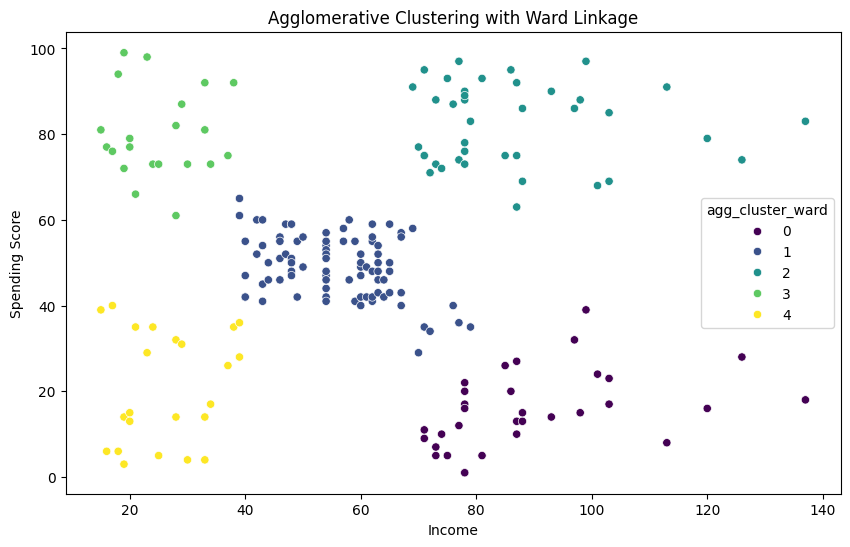

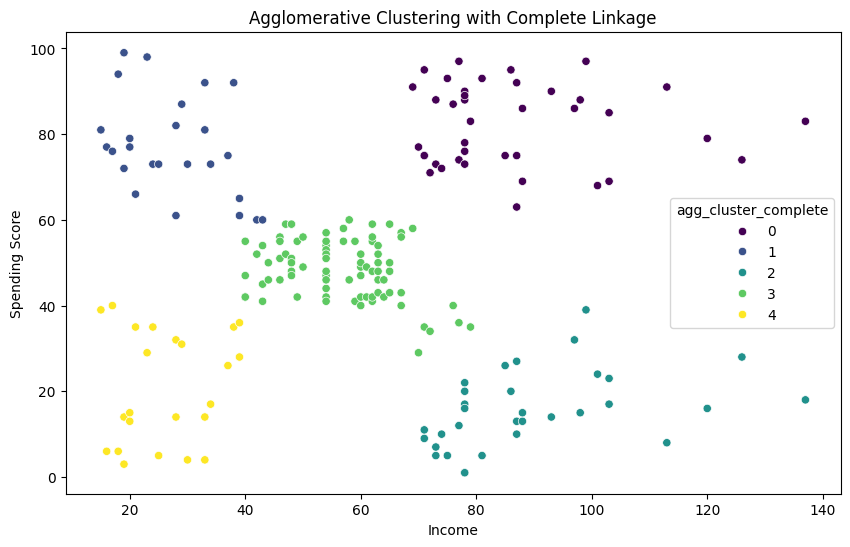

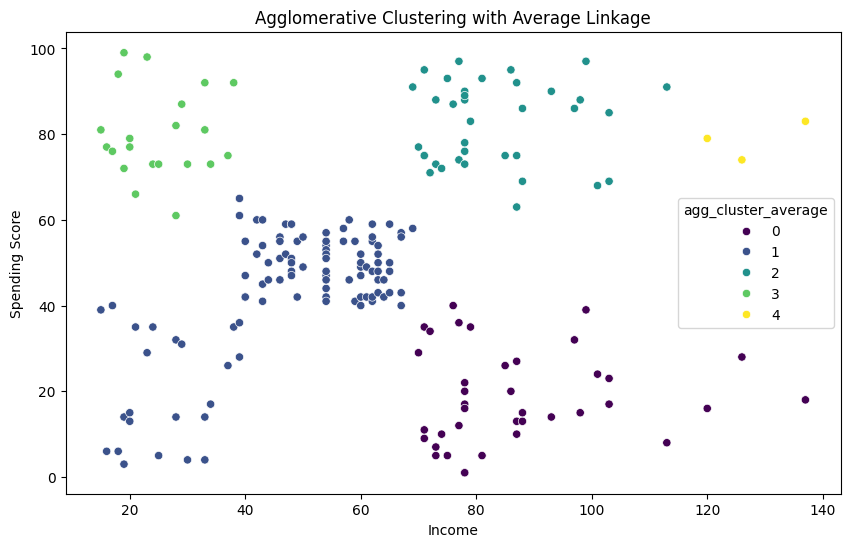

In [16]:

agg_cluster_ward = AgglomerativeClustering(n_clusters=5, linkage='ward')
X['agg_cluster_ward'] = agg_cluster_ward.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='agg_cluster_ward', palette='viridis', legend='full')
plt.title('Agglomerative Clustering with Ward Linkage')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

agg_cluster_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
X['agg_cluster_complete'] = agg_cluster_complete.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='agg_cluster_complete', palette='viridis', legend='full')
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

agg_cluster_average = AgglomerativeClustering(n_clusters=5, linkage='average')
X['agg_cluster_average'] = agg_cluster_average.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='agg_cluster_average', palette='viridis', legend='full')
plt.title('Agglomerative Clustering with Average Linkage')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.show()

**Висновки з завдання 12 (детальні)**

1. Ward Linkage vs. Complete Linkage: На графіках Agglomerative Clustering with Ward Linkage і Agglomerative Clustering with Complete Linkage ми спостерігаємо, що кластери змінили своє положення місцями. Це може бути зумовлено різними підходами до обчислення відстаней між кластерами. У випадку Ward Linkage кластери мають більш компактні форми і однорідні розподіли, тоді як Complete Linkage може призвести до утворення менш однорідних кластерів, де об'єкти можуть бути далеко розташовані один від одного.

2. Average Linkage: Графік Agglomerative Clustering with Average Linkage показує схожість з графіком Agglomerative Clustering with Ward Linkage, але кластер 1 (agg_cluster_average) заповнив ділянки кластера 4 (agg_cluster_average), а сам кластер 4 перейшов в діапазон витрат від 60 до 80 та доходу від 120 до 140. Це свідчить про те, що метод Average Linkage в даному випадку знаходить золоту середину між Ward та Complete Linkage, але може мати деякі особливості у розподілі об'єктів між кластерами.

**Завдання 13** 

А тепер зробимо порівняльний аналіз отриманих результатів кластеризації розглянутими методами:  
* В фінальних візуалізаціях треба використовувати **однакову** (на вашу думку оптимальну) кількість кластерів!!!  

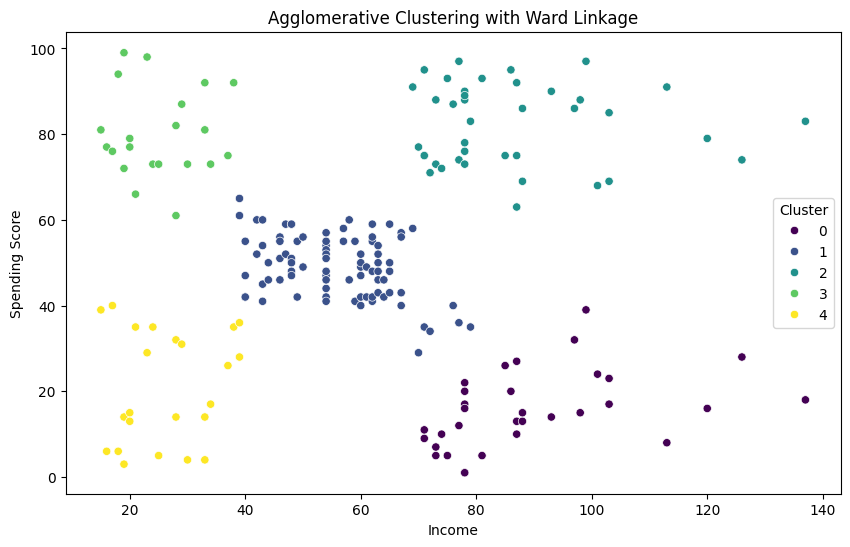

In [17]:
num_clusters = 5
linkage_method = 'ward' 

agg_cluster = AgglomerativeClustering(n_clusters=num_clusters, linkage=linkage_method)
X['cluster'] = agg_cluster.fit_predict(X)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=X, x='Income', y='SpendingScore', hue='cluster', palette='viridis')
plt.title(f'Agglomerative Clustering with {linkage_method.capitalize()} Linkage')
plt.xlabel('Income')
plt.ylabel('Spending Score')
plt.legend(title='Cluster')
plt.show()


**Висновки з завдання 13 (детальні)**

1. У цьому завданні для порівняння було обрано метод ward, оскільки він зазвичай працює добре для даних з випадковим розподілом та забезпечує кластери, які мають приблизно однакові розміри.

2. Результати кластеризації: Після застосування агломеративної кластеризації з методом ward були отримані кластери з однаковою кількістю точок у кожному кластері, що свідчить про хорошу балансованість кластерів. Візуальний аналіз показав, що кожен кластер має свої характеристичні властивості залежно від рівня доходу та рівня витрат.